In [17]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
input = pd.read_csv('data-onlinePCA.txt', sep=',')
data = np.copy(input.ix[:, 1:3])
data[0:3, :]

array([[-0.00973418,  0.22449331],
       [ 0.04644704,  1.57767475],
       [-0.09561311, -0.44307315]])

In [19]:
weight = np.array([[0.0, 0.0] for i in range(len(data))])
weight[0] = [1.0, 1.0]
for i in range(len(data)):
    y = np.dot(weight[i-1].T, data[i-1])                # = y
    weight[i] = np.dot(y, weight[i-1])                  # = ans * w
    weight[i] = data[i-1] - weight[i]                   # = x - ans         = x - yw
    weight[i] = weight[i-1] + 0.002 * y * weight[i]     # = w + e * y * ans
    if i % 2000 == 0:
        weight[i] = [1.0, 1.0]
weight[0:4, :]

array([[ 1.        ,  1.        ],
       [ 0.99990358,  1.00000418],
       [ 0.9947794 ,  0.99985328],
       [ 0.99430618,  0.99975107]])

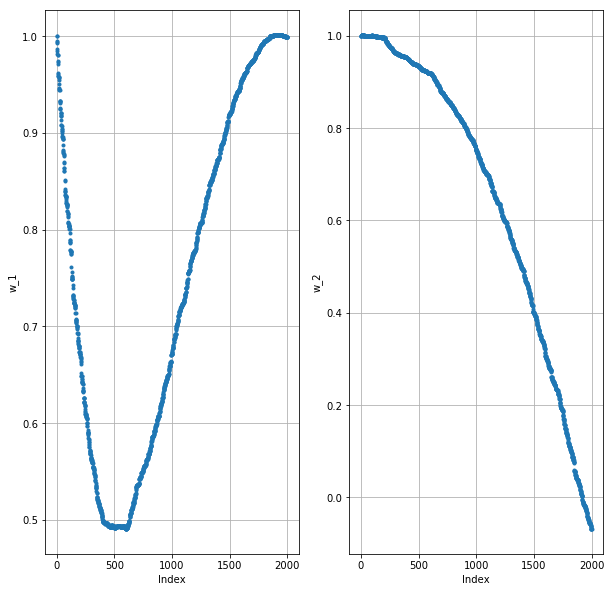

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 10))

for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.plot(weight[:, i], '.')
    plt.ylabel('w_{}'.format(i+1))
    plt.grid()
    plt.xlabel('Index')